<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from collections import defaultdict
sns.set(style = 'white', color_codes=True)

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
sat_dict = defaultdict(list)
# other options sat_dict = {'col1': [],...}

with open('./sat_scores.csv', 'r') as f:
    sat = csv.reader(f)
    # sat is now pointing to the start of the file
    
    # we can grab the first line of this iterator by using next
    header = next(sat)
    
    for line in sat:
        for i,col in enumerate(header):
            sat_dict[col].append(line[i])
        

In [4]:
pprint(sat_dict,compact = True, width = 120)

defaultdict(<class 'list'>,
            {'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489',
                      '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439',
                      '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561',
                      '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'],
             'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57',
                      '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13',
                      '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4',
                      '4', '45'],
             'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC',
             

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# Making a Pandas DataFrame object by using read_csv()
path_to_sat_file = './sat_scores.csv'
sat_df = pd.read_csv(path_to_sat_file)
sat_df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
# DataFrame type when loading from file
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
# Making a Pandas DataFrame from the sat dictionary
df_sat_from_dict = pd.DataFrame(sat_dict)
df_sat_from_dict

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [8]:
# DataFrame type when loading from dictionary
df_sat_from_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

### Making the DataFrame using the .read_csv() has the columns with numbers as int64 type whereas these columns are of type object when inputted from the dictonary.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
# Looking at the first 10 rows of the DataFrame
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [10]:
sat_df.shape

(52, 4)

### The data shows the first ten rows of the SAT dataset. It has four columns: State a student is from, a Rate column, Verbal and Math scores of the student.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
# Creating an empty dictionary to store variable details
sat_dict = {}

# A function to create variable descriptions quickly
def create_sat_dict(df):
    sat_dict['shape'] = df.shape
    sat_dict['description'] = {
        'State':'The state each student is from',
        'Rate':'Rate score of each student on the SAT',
        'Verbal':'Verbal score of each student on the SAT',
        'Math':'Math score of each student on the SAT'
    } 
    sat_dict['type'] = df.dtypes

In [12]:
# Passing the dataframe to the function
create_sat_dict(sat_df)

In [13]:
# Printing the dictionary which contains a description of the dataset
pprint(sat_dict)

{'description': {'Math': 'Math score of each student on the SAT',
                 'Rate': 'Rate score of each student on the SAT',
                 'State': 'The state each student is from',
                 'Verbal': 'Verbal score of each student on the SAT'},
 'shape': (52, 4),
 'type': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [14]:
# Creating a function which can be called when plotting the distribution of a column
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, bins=10, kde=False, color="g")
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

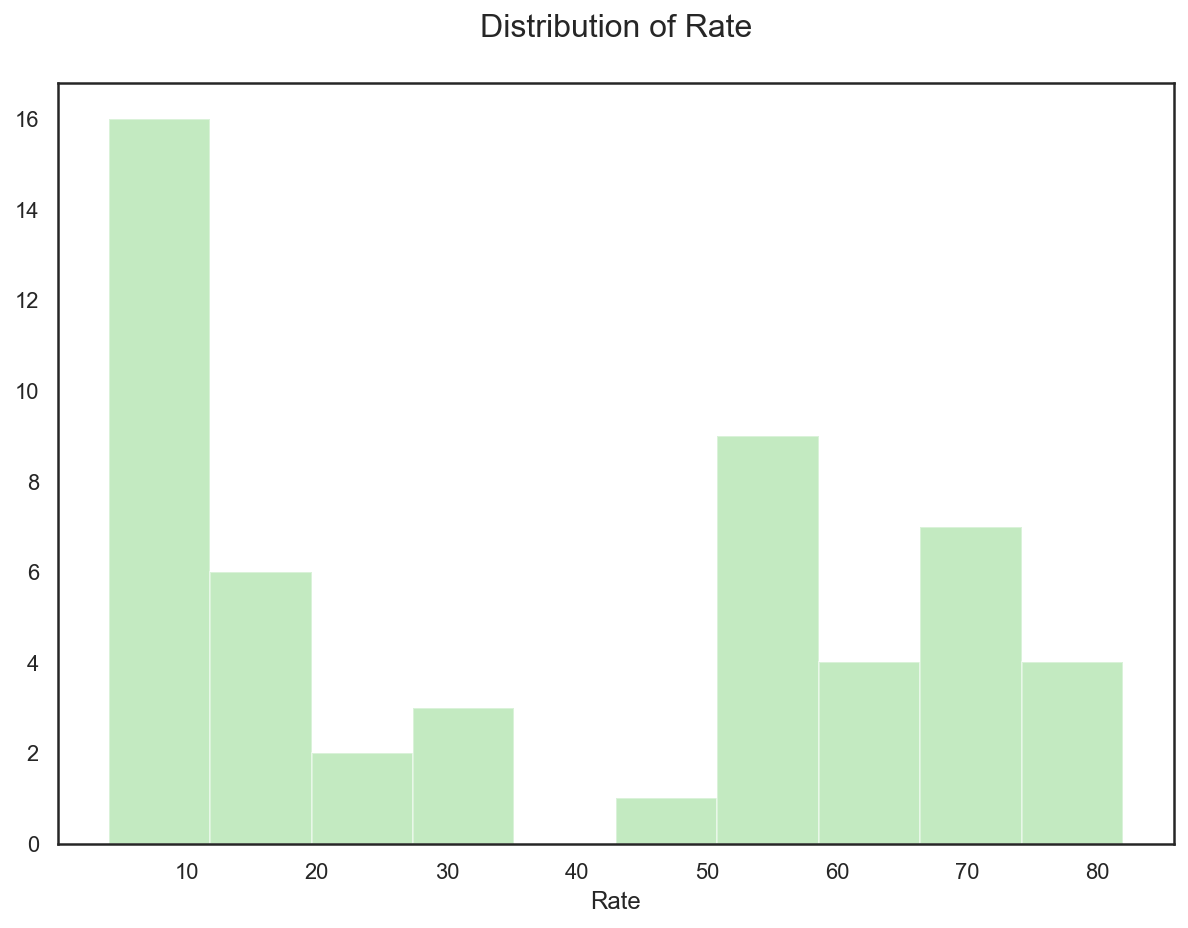

In [15]:
# Distribution of Rate variable
distribution_plotter('Rate', sat_df)

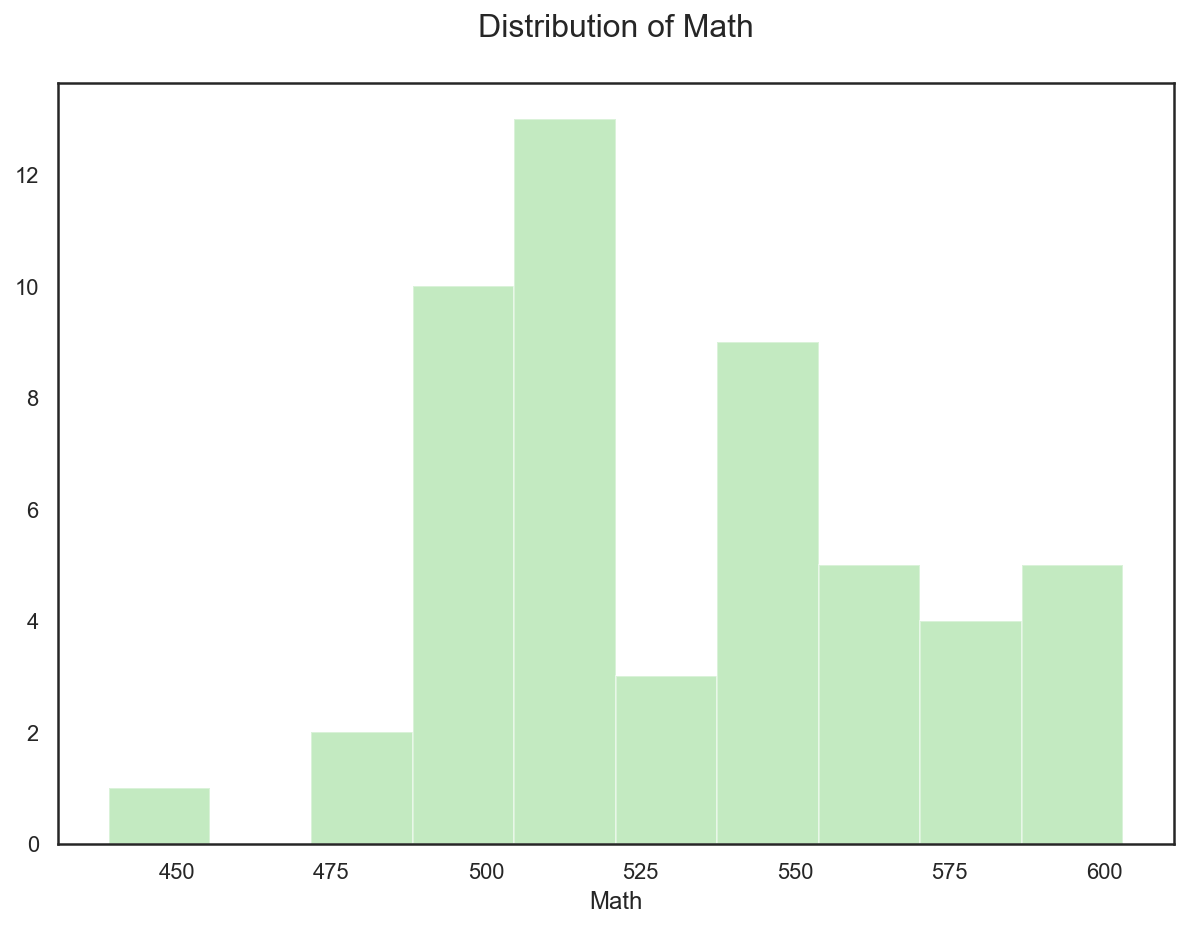

In [16]:
# Distribution of Math variable
distribution_plotter('Math', sat_df)

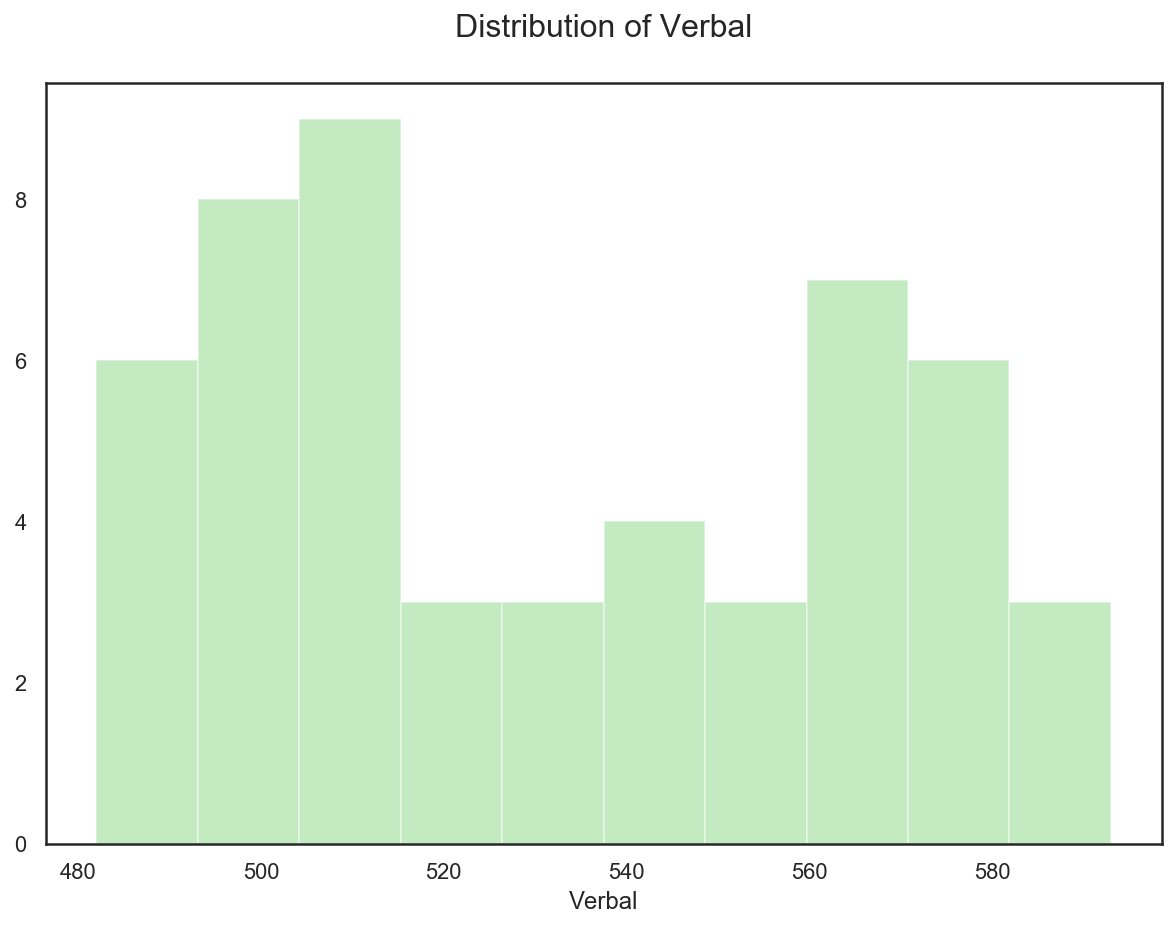

In [17]:
# Distribution of Verbal variable
distribution_plotter('Verbal', sat_df)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

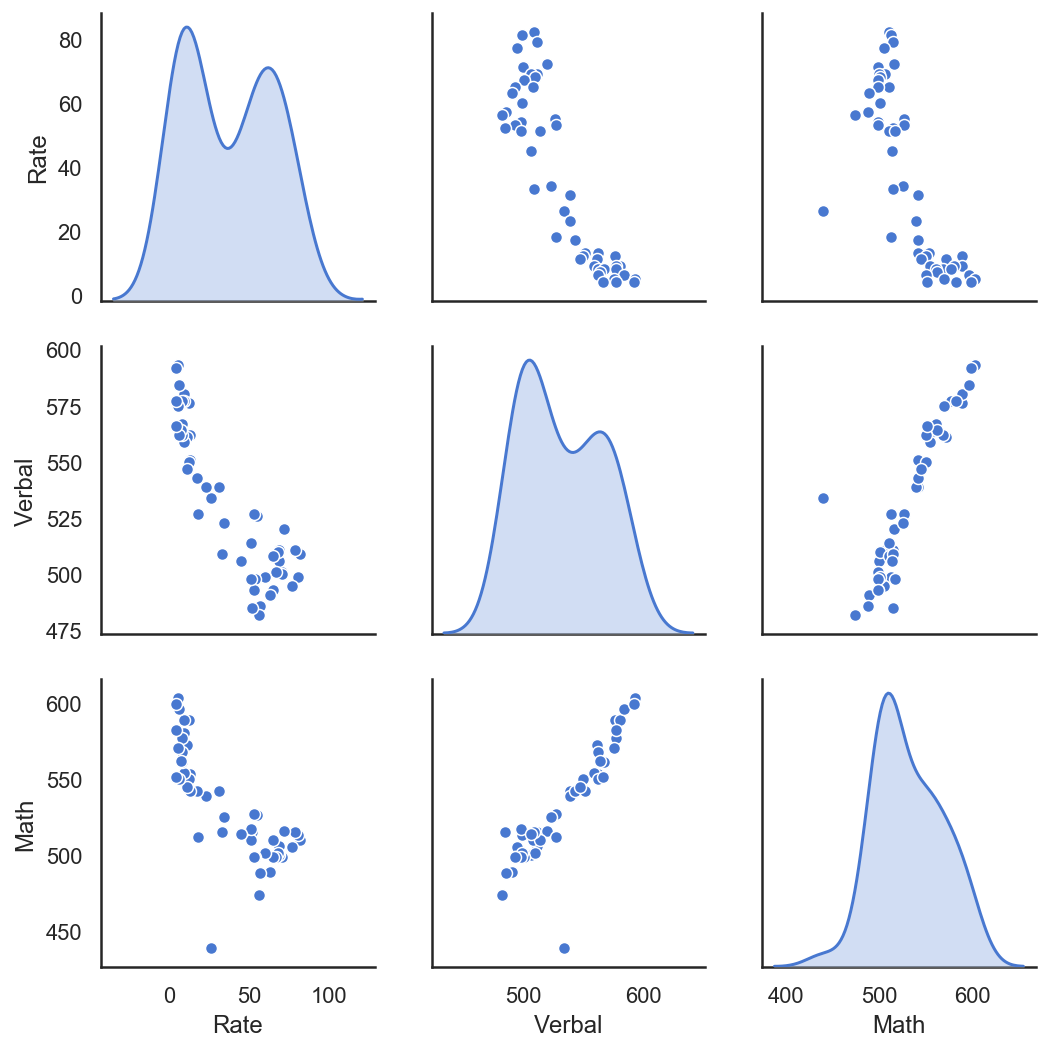

In [18]:
# Plotting pairplot for all variables except State
ax_pp = sns.pairplot(sat_df, vars=["Rate", "Verbal", "Math"], diag_kind='kde')

### Math and verbal scores show a strong positive correlation between each other. On the other hand, both Math and Verbal scores show a somewhat negative linear relationship with the Rate variable. Exact values of the correlations could be calculated to quantify the strength of these relationships.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

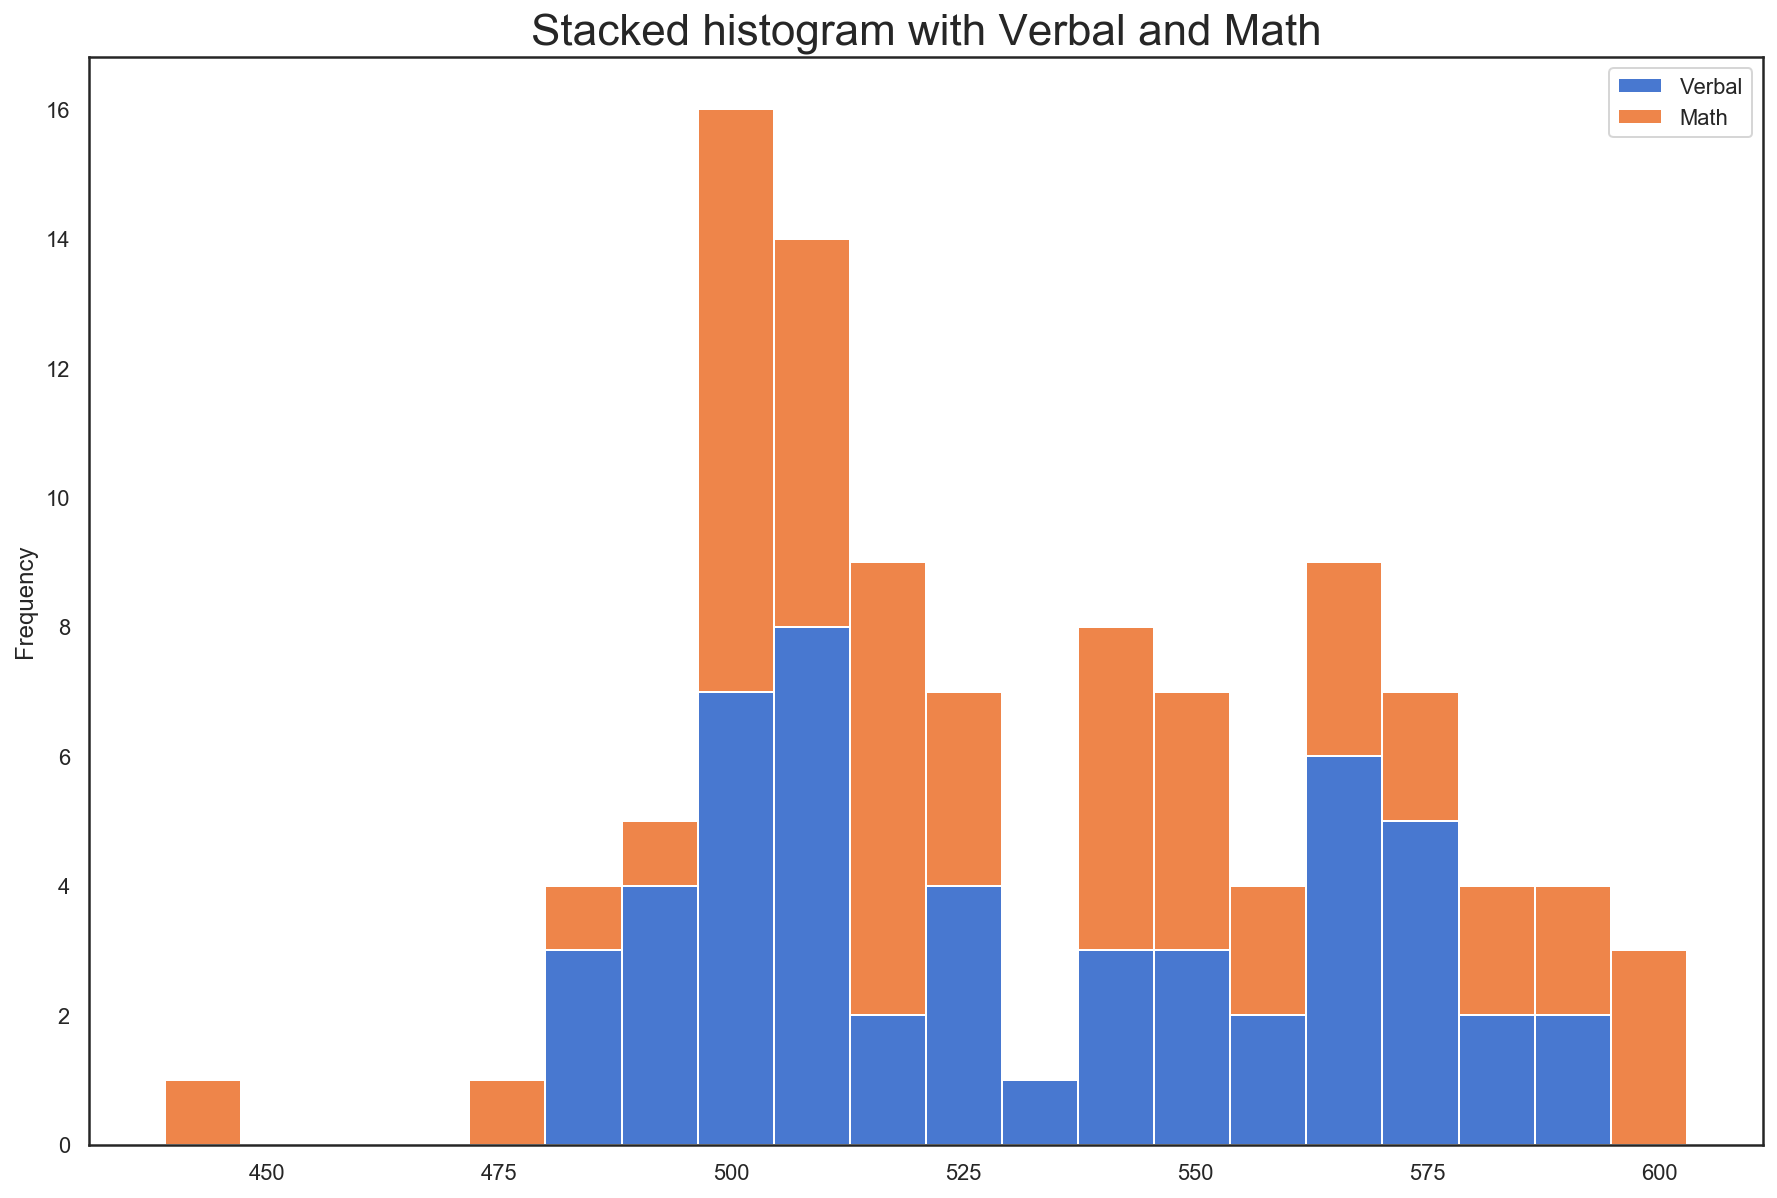

In [19]:
# Assigning the stacked histogram to an axis object and plotting the data
ax_sh = sat_df[['Verbal','Math']].plot(kind='hist', stacked=True, figsize=(15,10), bins=20)
ax_sh.set_title('Stacked histogram with Verbal and Math', fontsize=22)
ax_sh.legend(loc=1)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5, 1.0, 'Box plots with Verbal and Math')

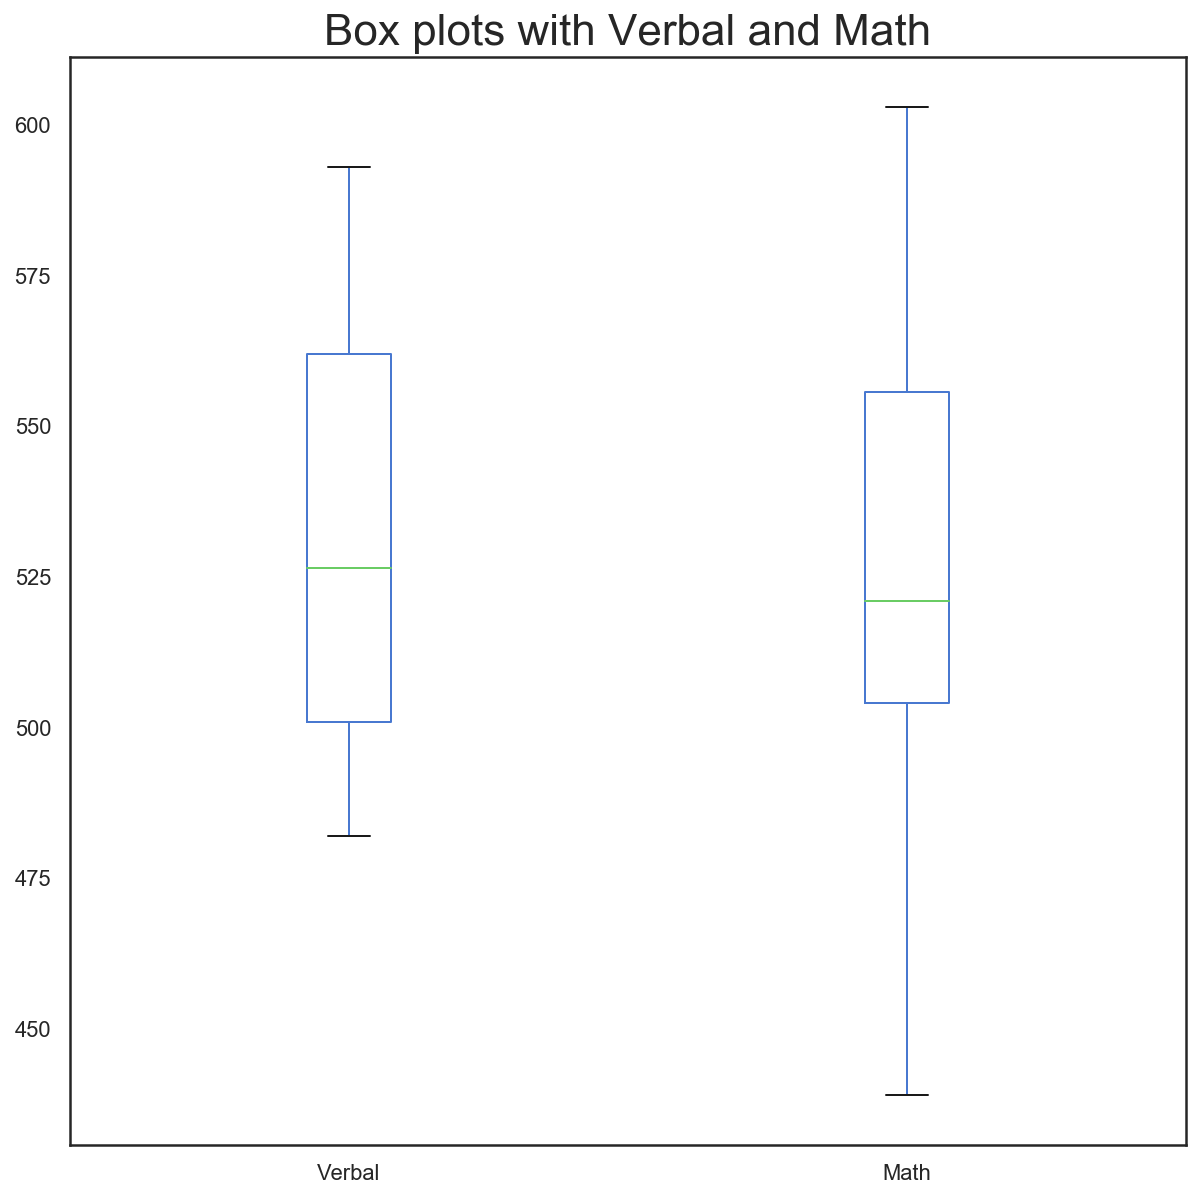

In [20]:
# Plotting Verbal and Math on the same chart using boxplots
ax_bp = sat_df[['Verbal','Math']].plot(kind='box', figsize=(10,10))
ax_bp.set_title('Box plots with Verbal and Math', fontsize=22)

Text(0.5, 1.0, 'Box plots with Rate, Verbal & Math')

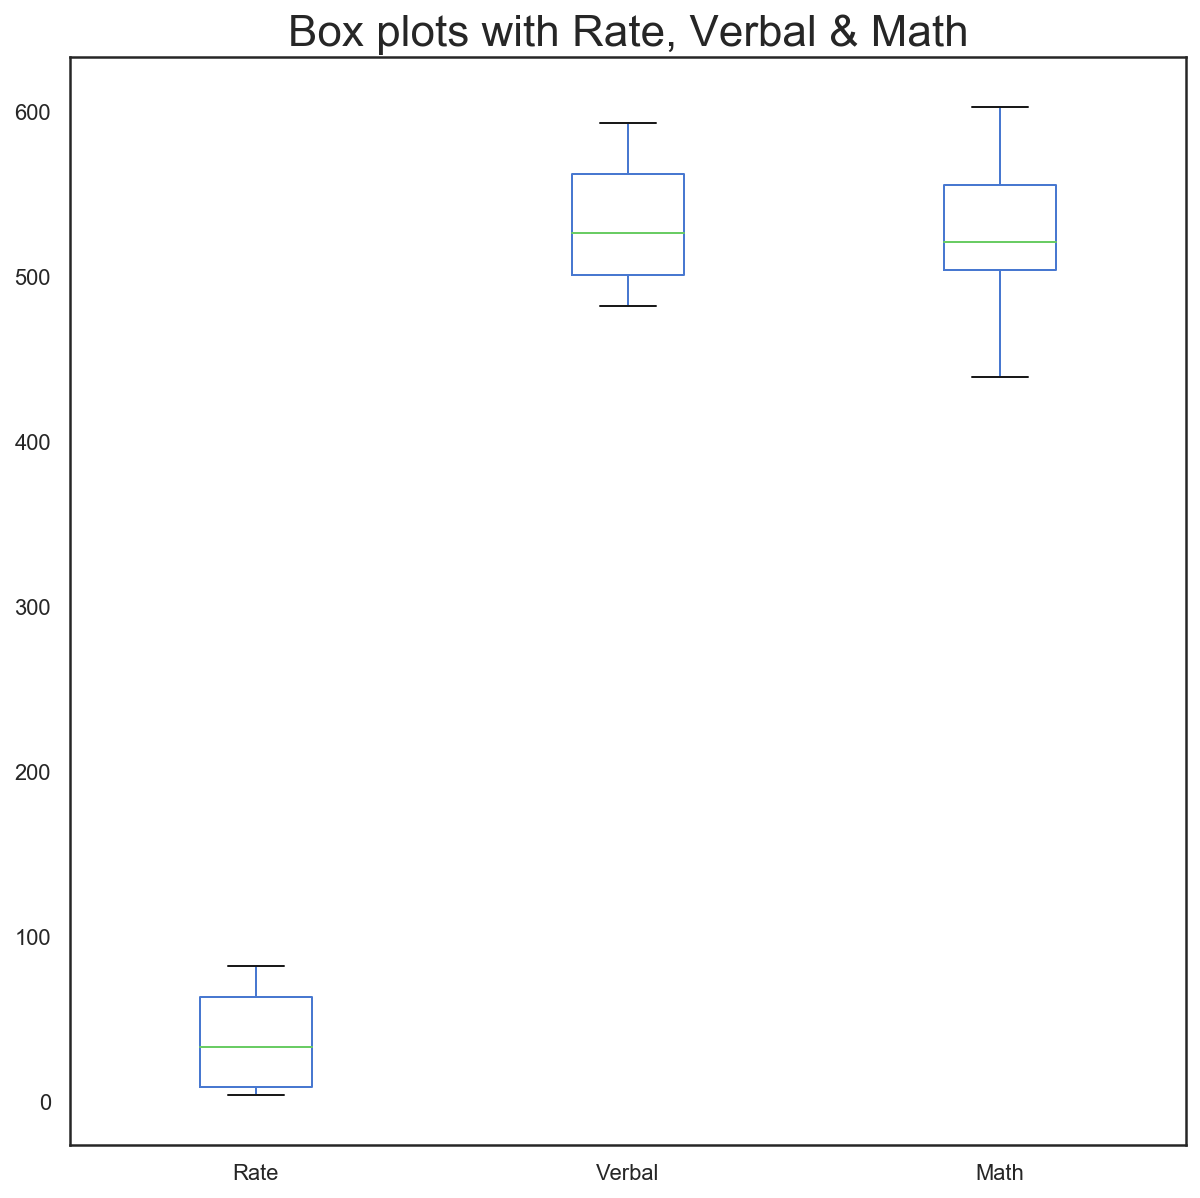

In [21]:
# Boxplots of Rate, Verbal and Math variables on the same chart
ax_bp1 = sat_df.plot(kind='box', figsize=(10,10))
ax_bp1.set_title('Box plots with Rate, Verbal & Math', fontsize=22)

### Using a box-plot has several advantages such as the ability to compare the minimum, 25th, 50th(median), 75th percentile and maximum values of variables with those of other variables. These can not be compared with scatter plot or histogram which are useful to compare other features such as correlation and frequency distribution. 

### Including box plot of the Rate variable on the same chart with the Verbal and Math variable does not allow us to fully understand the plots of each of the variables as the range of values of the Rate variable is different than that of Verbal and Math variables. One way to solve this is to standardize all variables on the same scale which would allow for each comparison of variables against each other.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
# Mean of verbal scores
np.mean(sat_df['Verbal'])

532.0192307692307

In [23]:
# States where verbal scores are greater than average of verbal scores across states
states_gr_mean = sat_df[sat_df['Verbal'] > np.mean(sat_df['Verbal'])].loc[:,'State']

In [24]:
# Printing states
states_gr_mean

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [25]:
len(states_gr_mean)

24

### There are 24 states where the verbal scores is greater than the mean verbal score. This shows that 24 of all the states in the US have performed above average in the verbal section of the SAT, whereas the other states have performed below average in the verbal section of the SAT. This could also indicate that the scoring pattern is similar in the Math section as Verbal and Math scores have a positive linear correlation as can be seen in the pair plot above.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [26]:
# Median of verbal scores
np.median(sat_df['Verbal'])

526.5

In [27]:
# States where verbal scores are greater than the median of verbal scores across states
states_gr_median = sat_df[sat_df['Verbal'] > np.median(sat_df['Verbal'])].loc[:,'State']

In [28]:
states_gr_median

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [29]:
len(states_gr_median)

26

### There are more states greater than the median of verbal scores than there are states greater than the mean. This is because the mean of the verbal score is greater than the median. This shows that the verbal score distribution is skewed slightly to the right.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [30]:
# Creating a new column 'Verbal - Math' in the dataframe and printing the new dataframe
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


 ### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
# Dataframe containing the top 10 states with verbal scores greater than math scores
df_v_gr_m = sat_df.sort_values(['Verbal - Math'], axis=0, ascending=False).head(10)

In [32]:
# Showing the top 3 states with verbal scores greater than math scores
df_v_gr_m.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [33]:
# Dataframe containing top 10 states with math scores greater than verbal scores
df_m_gr_v = sat_df.sort_values(['Verbal - Math'], axis=0, ascending=True).head(10)

In [34]:
# Showing the top 3 states with math scores greater than verbal scores
df_m_gr_v.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [35]:
# Correlation matrix of all variables excluding State
print(sat_df[['Rate','Verbal','Math','Verbal - Math']].corr())


                   Rate    Verbal      Math  Verbal - Math
Rate           1.000000 -0.886432 -0.773746      -0.101412
Verbal        -0.886432  1.000000  0.899871       0.052600
Math          -0.773746  0.899871  1.000000      -0.388219
Verbal - Math -0.101412  0.052600 -0.388219       1.000000


### It shows us that Math and Verbal scores are highly positively correlated with a correlation score of 0.89. Rate and Verbal scores are slightly more correlated than Rate and Math scores, although this is a negative linear relationship.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [36]:
sat_df.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### The .describe() function allows us to see that although the Verbal and Math scores are highly correlated, there is more variance among the values taken up by the Math variable as opposed to Verbal variable due to the larger standard deviation. Students have scored the maximum and minimum scores of larger magnitude on the Math section than the verbal section.

### The data also shows the 25th, 50th and 75th percentile values as well as how many scores of each variable have been recorded.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [37]:
# Making a Pandas DataFrame object from the Drug use data by using read_csv()
path_to_druguse_file = './drug-use-by-age.csv'
druguse_df = pd.read_csv(path_to_druguse_file)
druguse_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [38]:
# Dataframe variable types
druguse_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### A quickview of the datatypes shows that there are certain variables such as age, crack-frequency etc which were supposed to be of int/float type however are being shown as object type. This suggests that the columns have certain characters other than numbers which might require cleaning.

In [39]:
# Length of the dataset
print(len(druguse_df))

17


### A quick view of the dataframe on loading shows that there are invalid characters '-', which is not a standard form of representing null values. This has to be converted to NaN for easy operation on null values using Pandas. Depending on which columns are likely to yield good insights into the data, cells with these invalid characters can be removed or can be left as such to avoid introducing error into the descriptive statistics. Other than this invalid character, there is no other issue with the data. The age has few rows with a range instead of exact values, but this will not impact the analysis of the rest of the variables which are more important.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
#Replacing invalid '-' characters with NaN to standardize null values (in the original dataframe).
druguse_df.replace('-', np.nan, inplace=True)

In [41]:
druguse_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [42]:
# Converting variables of object type to float
druguse_df[["cocaine-frequency","crack-frequency","heroin-frequency","inhalant-frequency","oxycontin-frequency","meth-frequency"]] = druguse_df[["cocaine-frequency","crack-frequency","heroin-frequency","inhalant-frequency","oxycontin-frequency","meth-frequency"]].apply(pd.to_numeric)

In [43]:
# Checking variable types after conversion
druguse_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [44]:
druguse_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [45]:
# Number of null values in each column
druguse_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [46]:
# Checking the shape of the dataframe
druguse_df.shape

(17, 28)

In [47]:
# Viewing the first 10 rows of the dataframe
druguse_df.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


Text(0.5, 1.0, 'Box plots with Alcohol use and Heroin use')

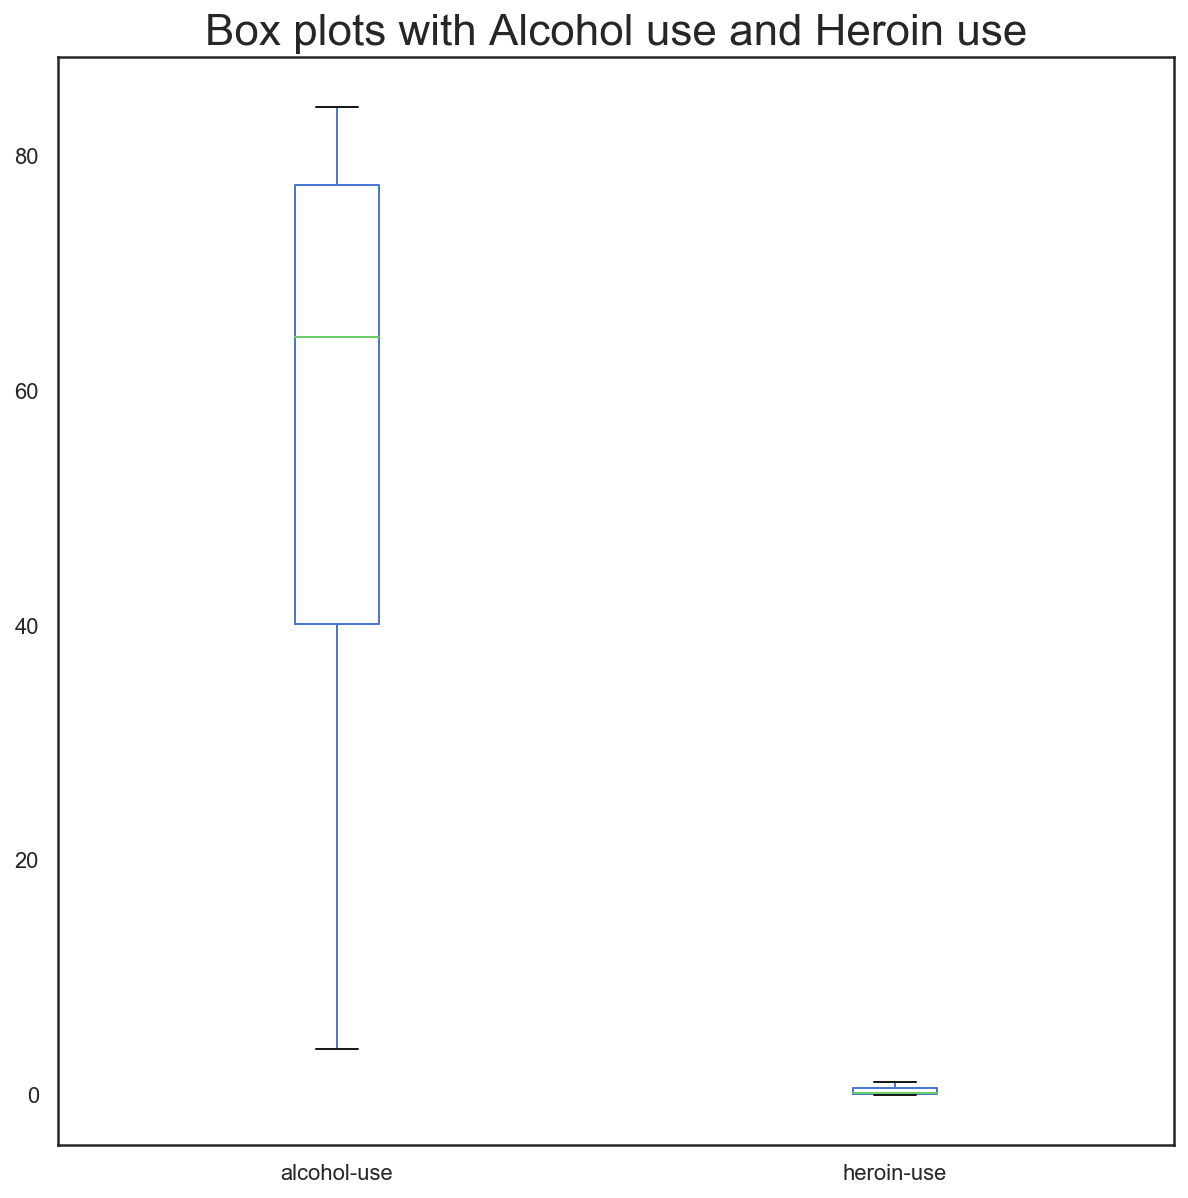

In [48]:
# Plotting Alcohol-use and Heroin-use on the same chart using boxplots
ax_ahu = druguse_df[['alcohol-use','heroin-use']].plot(kind='box', figsize=(10,10))
ax_ahu.set_title('Box plots with Alcohol use and Heroin use', fontsize=22)

Text(0.5, 1.0, 'Box plots with Alcohol frequency and Heroin frequency')

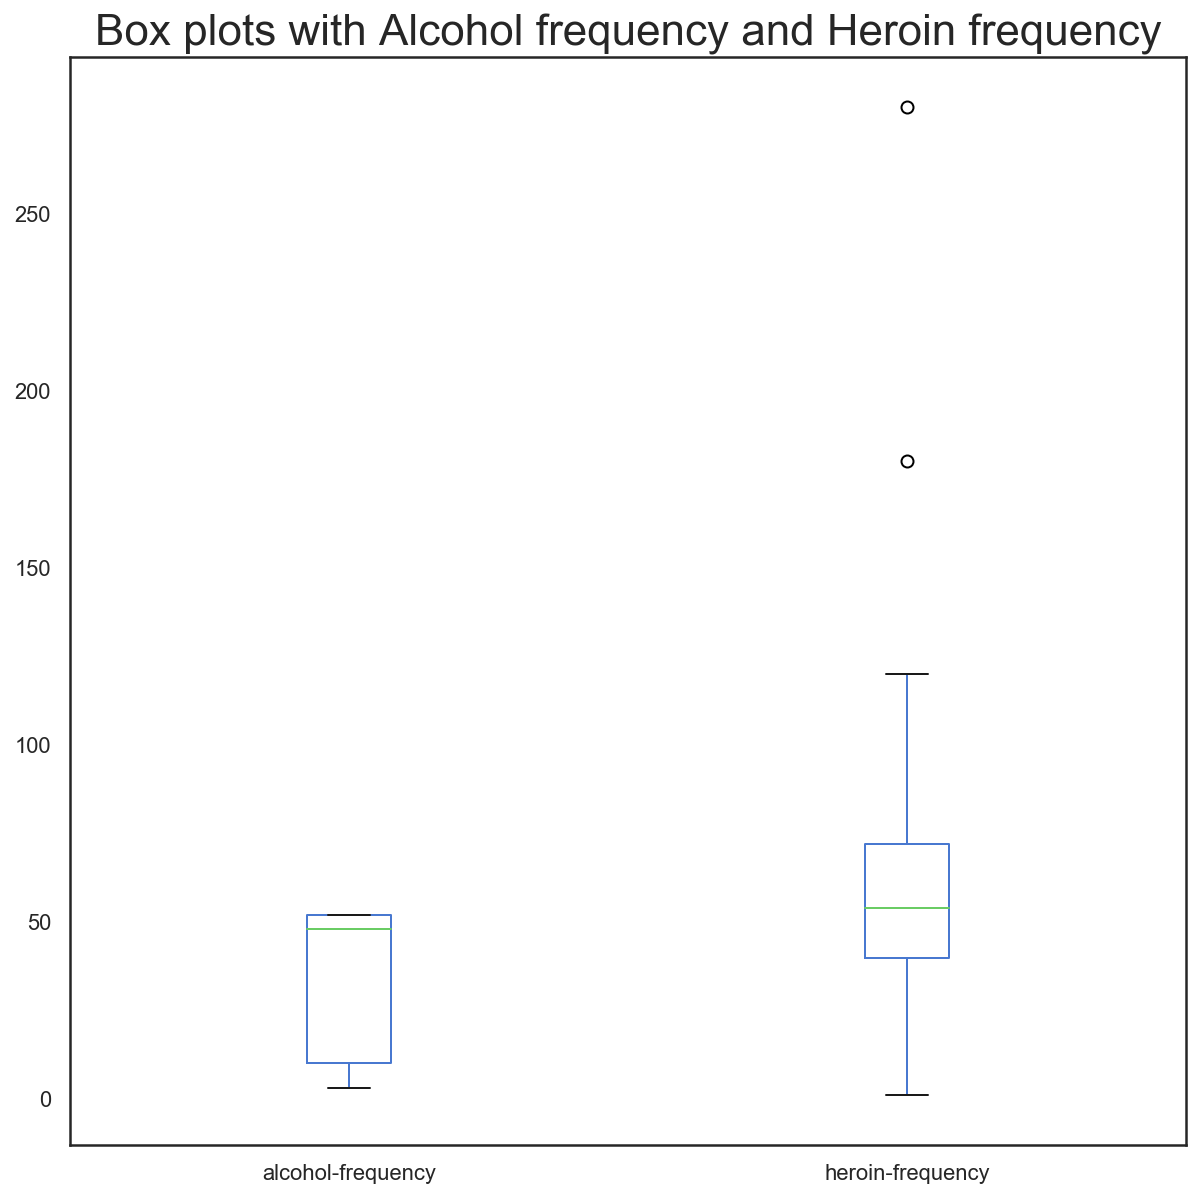

In [49]:
# Plotting Alcohol frequency and Heroin frequency on the same chart using boxplots
ax_ahf = druguse_df[['alcohol-frequency','heroin-frequency']].plot(kind='box', figsize=(10,10))
ax_ahf.set_title('Box plots with Alcohol frequency and Heroin frequency', fontsize=22)

In [50]:
# Creating a new dataframe with the original data for standardization
druguse_df_new = druguse_df.copy()
# Standardizing the columns for replotting box plots
druguse_df_new['alcohol-use'] = (druguse_df_new['alcohol-use'] - np.mean(druguse_df_new['alcohol-use']))/np.std(druguse_df_new['alcohol-use'])
druguse_df_new['heroin-use'] = (druguse_df_new['heroin-use'] - np.mean(druguse_df_new['heroin-use']))/np.std(druguse_df_new['heroin-use'])
druguse_df_new['alcohol-frequency'] = (druguse_df_new['alcohol-frequency'] - np.mean(druguse_df_new['alcohol-frequency']))/np.std(druguse_df_new['alcohol-frequency'])
druguse_df_new['heroin-frequency'] = (druguse_df_new['heroin-frequency'] - np.mean(druguse_df_new['heroin-frequency']))/np.std(druguse_df_new['heroin-frequency'])

Text(0.5, 1.0, 'Box plots with standardized Alcohol use and Heroin use')

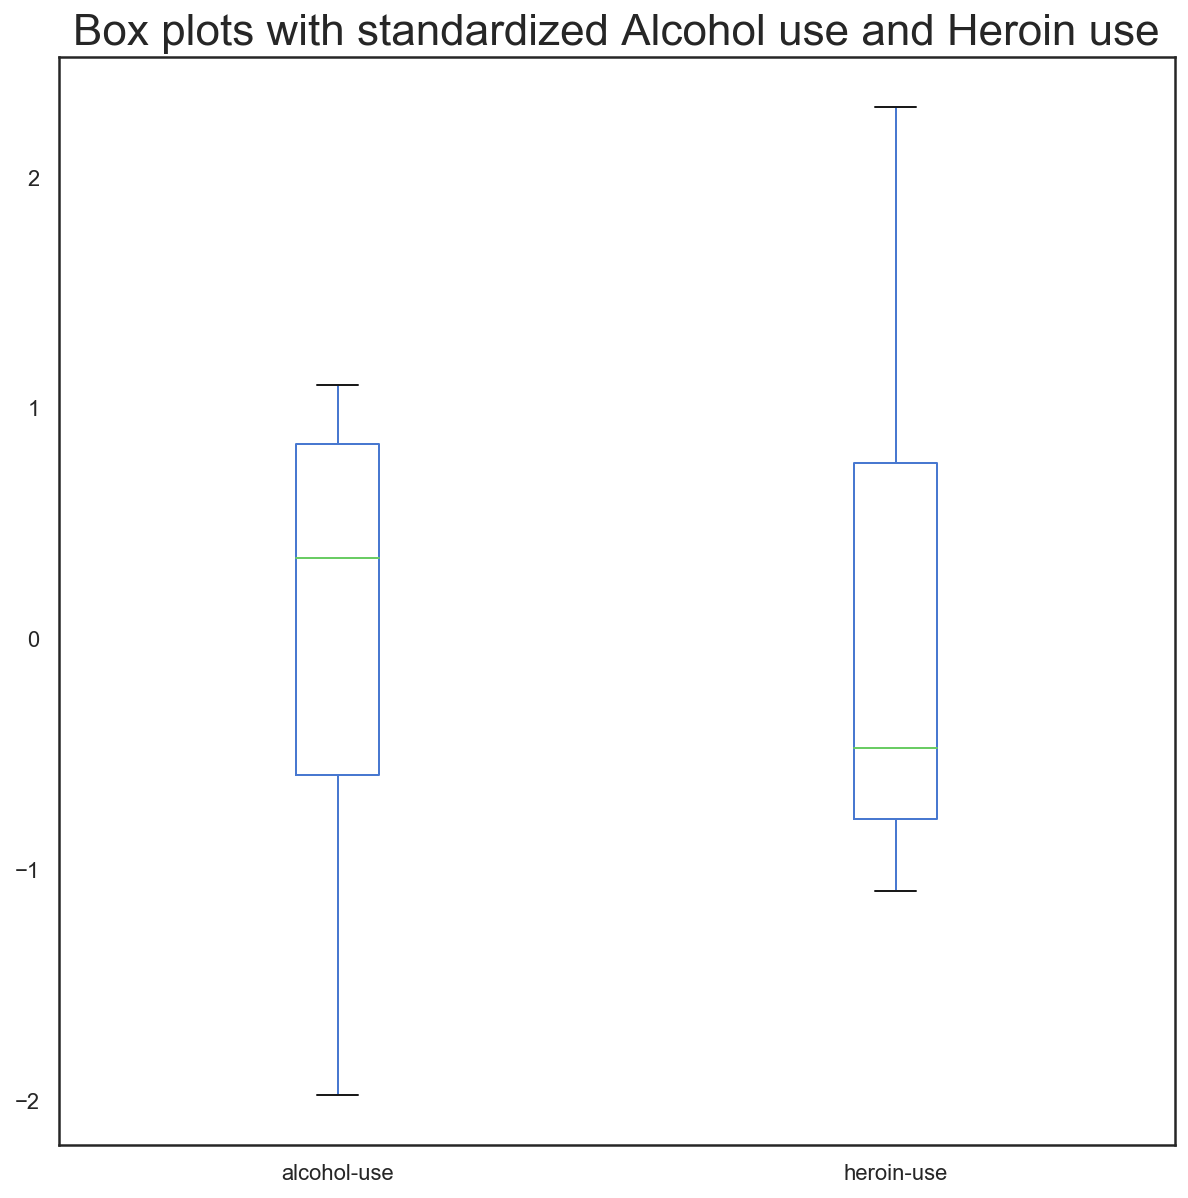

In [51]:
# Plotting standardized Alcohol frequency and Heroin use on the same chart using boxplots
ax_ahus = druguse_df_new[['alcohol-use','heroin-use']].plot(kind='box', figsize=(10,10))
ax_ahus.set_title('Box plots with standardized Alcohol use and Heroin use', fontsize=22)

Text(0.5, 1.0, 'Box plots with standardized Alcohol frequency and Heroin frequency')

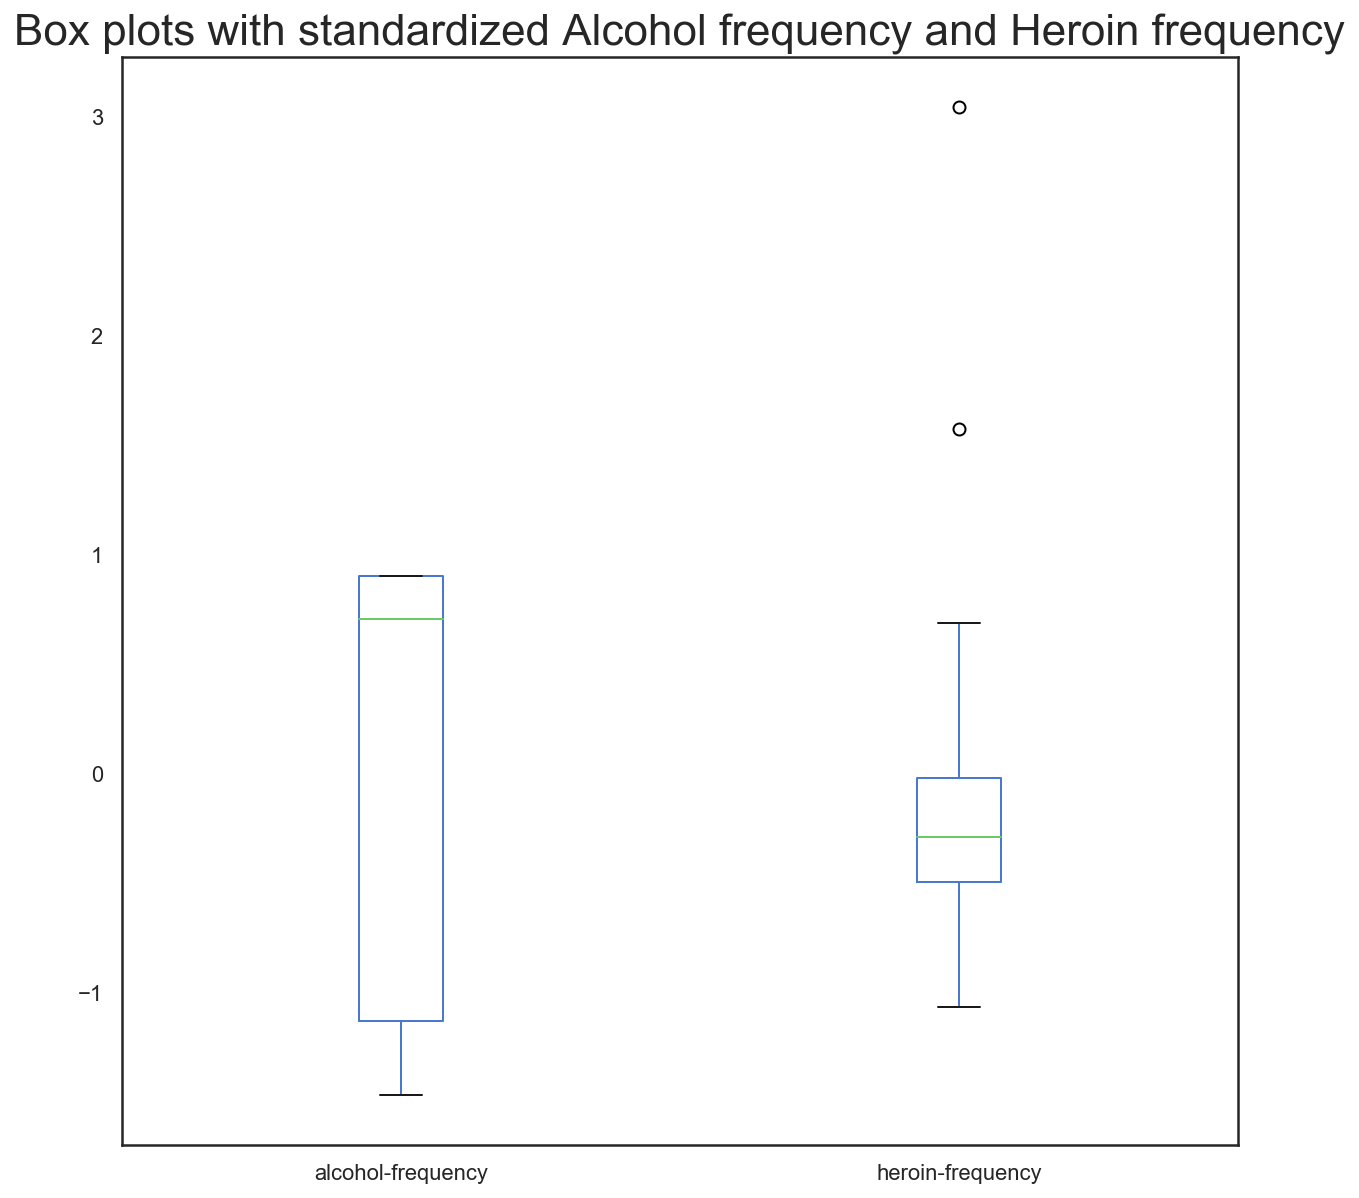

In [52]:
# Plotting standardized Alcohol frequency and Heroin frequency on the same chart using boxplots
ax_ahfs = druguse_df_new[['alcohol-frequency','heroin-frequency']].plot(kind='box', figsize=(10,10))
ax_ahfs.set_title('Box plots with standardized Alcohol frequency and Heroin frequency', fontsize=22)

In [53]:
# Creating a new dataframe from the statistics obtained by using the .describe() function.
druguse_desc = druguse_df.describe().T
druguse_desc

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.000,2798.00,3058.000,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.100,64.60,77.500,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.700,20.80,28.400,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.500,2.00,4.000,4.9
cocaine-frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.000,0.40,0.500,0.6
crack-frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.100,0.20,0.600,1.1


In [54]:
# Dropping the row with 'n' as index
druguse_desc = druguse_desc.drop(['n'])

In [55]:
# Subsetting the drug use description dataset to contain only usage of drugs among people
drug_use = druguse_desc[druguse_desc.index.str.contains('use',case=False)]
drug_use

,count,mean,std,min,25%,50%,75%,max
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7
tranquilizer-use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4


Text(0.5, 1.0, 'Percentage of all age-groups who used each drug in last 12 months')

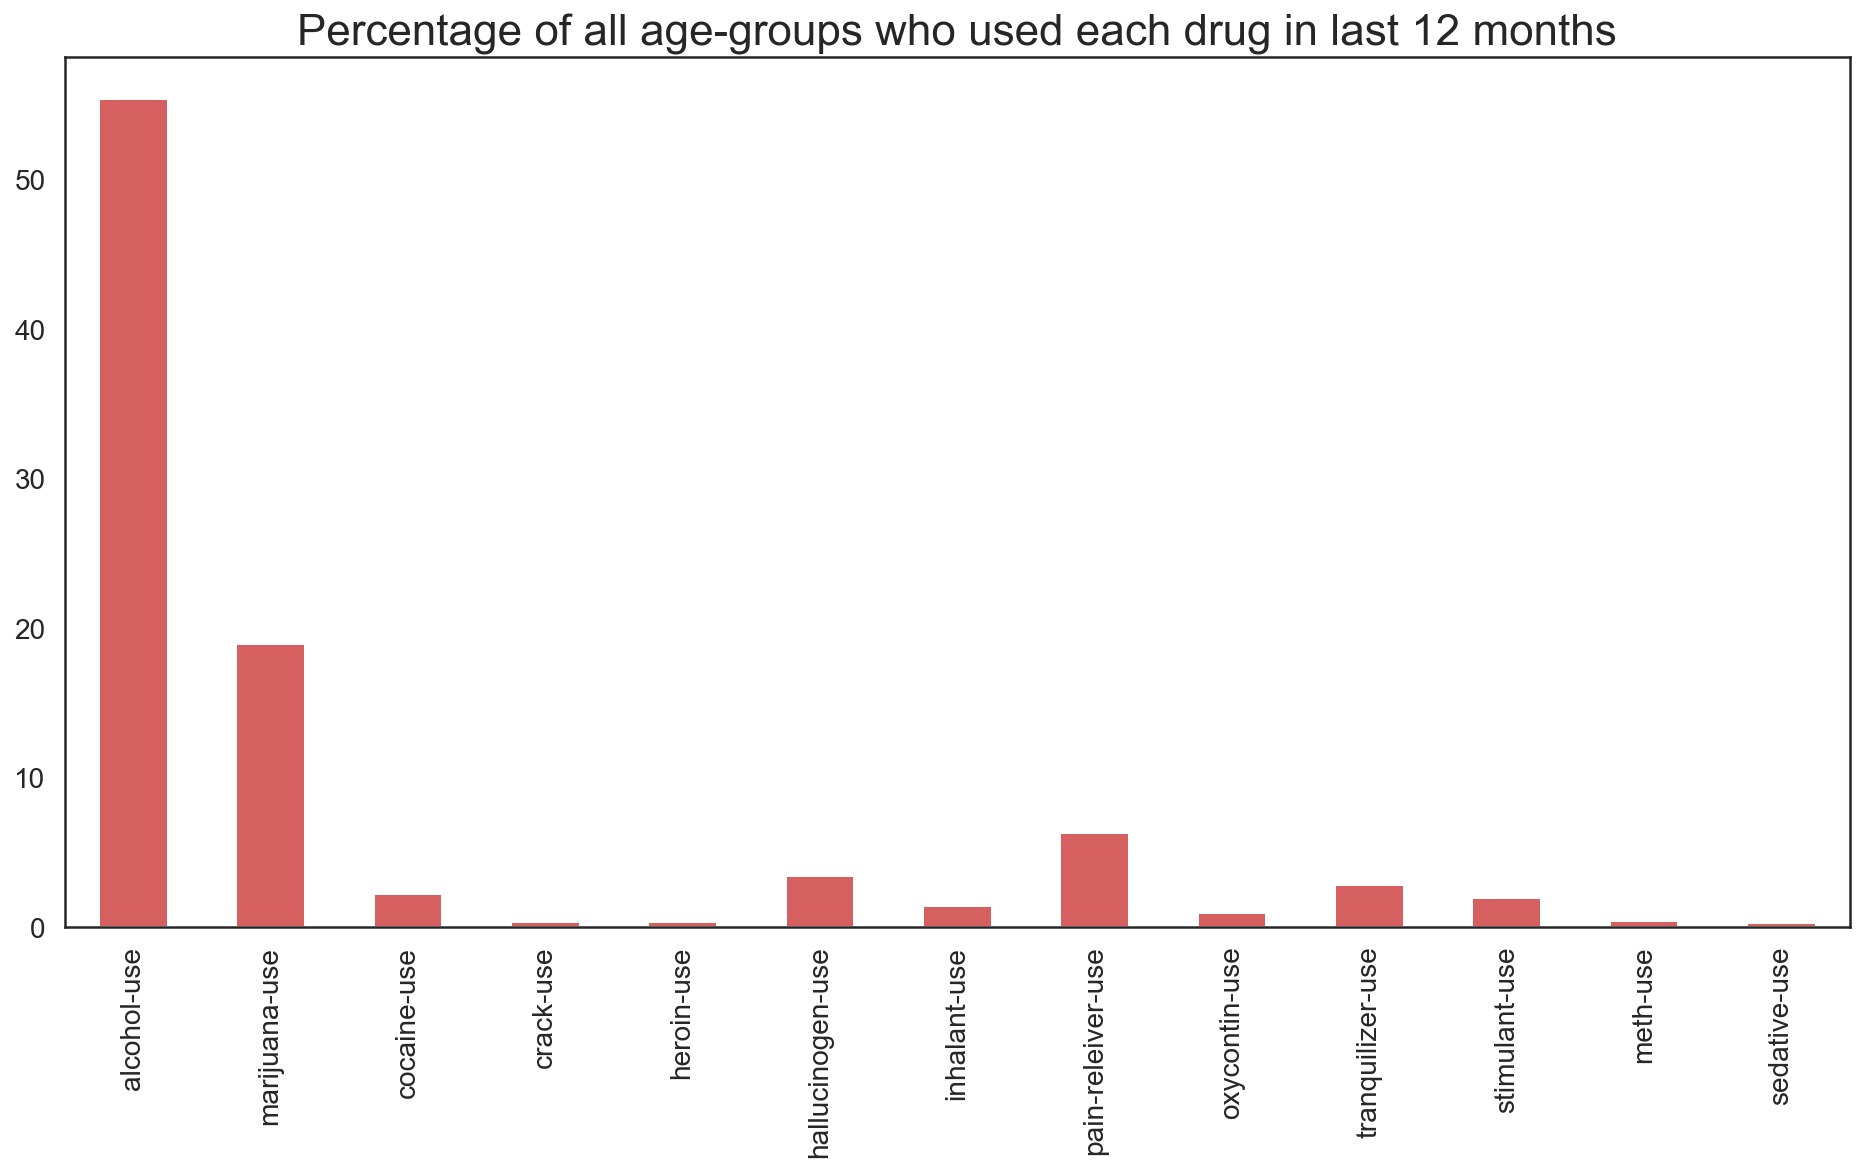

In [56]:
#Plotting the percentage of people across all age groups who used each drug in the past 12 months
ax_du = drug_use['mean'].plot(kind='bar', figsize=(16,8), fontsize=14, color='r')
ax_du.set_title("Percentage of all age-groups who used each drug in last 12 months", fontsize=22)

In [57]:
# Subsetting the drug use description dataset to contain only median frequency of drugs in the past 12 months 
drug_freq = druguse_desc[druguse_desc.index.str.contains('frequency',case=False)]
drug_freq

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine-frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack-frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin-frequency,16.0,73.281250,70.090173,1.0,39.625,53.75,71.875,280.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.000,3.00,4.000,52.0
inhalant-frequency,16.0,6.156250,4.860448,2.0,3.375,4.00,6.625,19.0
pain-releiver-frequency,17.0,14.705882,6.935098,7.0,12.000,12.00,15.000,36.0
oxycontin-frequency,16.0,14.812500,12.798275,3.0,5.750,12.00,18.125,46.0
tranquilizer-frequency,17.0,11.735294,11.485205,4.5,6.000,10.00,11.000,52.0


Text(0.5, 1.0, 'Frequency of drug use among the proportion of users in the last 12 months')

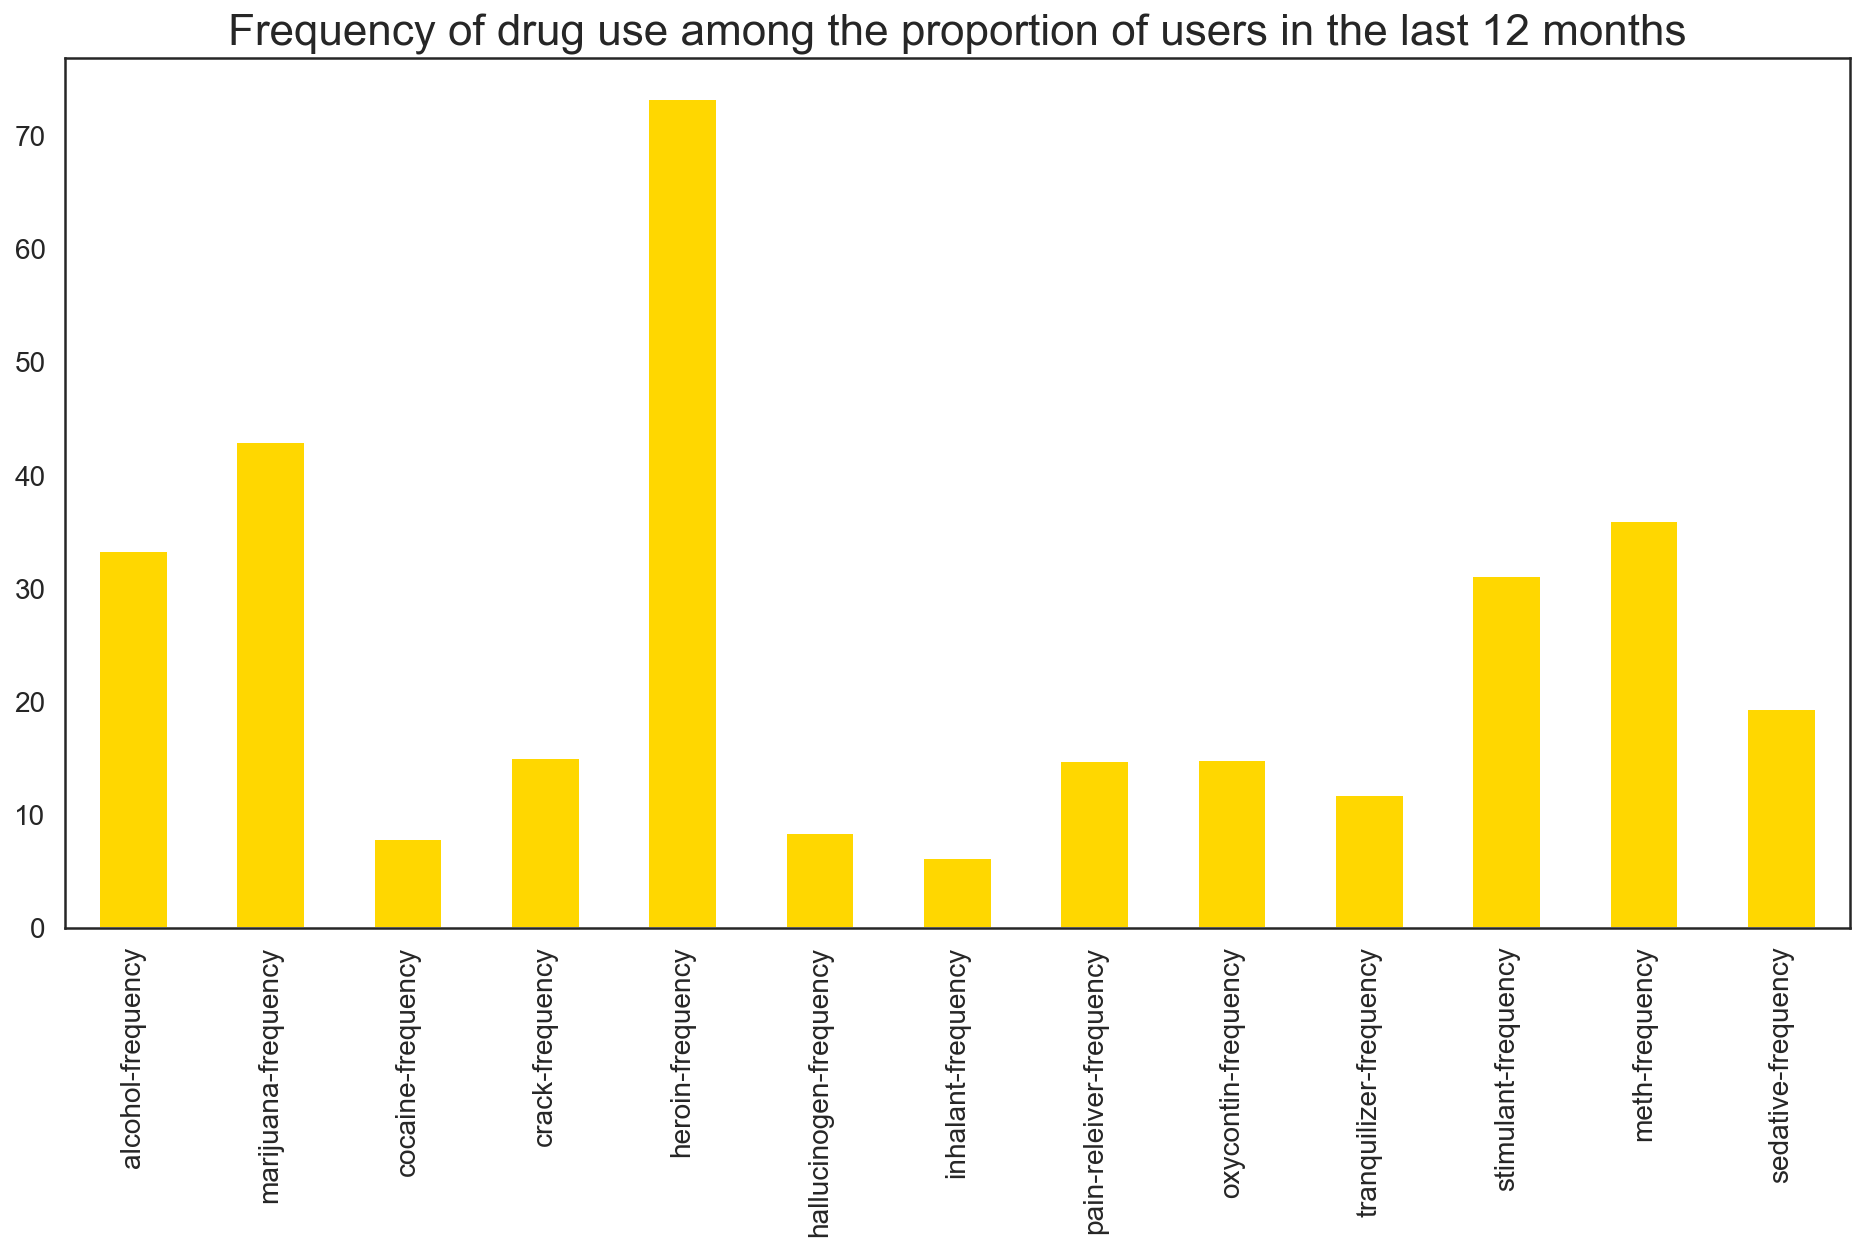

In [58]:
# Plotting how frequently the users of each drug accessed the drug across all age groups in the past 12 months
ax_dfr = drug_freq['mean'].plot(kind='bar', figsize=(16,8), fontsize=14, color='gold') 
ax_dfr.set_title("Frequency of drug use among the proportion of users in the last 12 months", fontsize=22)

### EDA Analysis: 
### The drug-use dataset provides data on the usage and frequency of drugs across age groups. From the data description it can be seen that the drug-use columns such as alcohol-use, crack-use etc show the percentage of each age group which use each drug. The drug-frequency columns such as alcohol-frequency, crack-frequency, etc. show how frequently the percentage of users in each age group have accessed the drug.

### As can be seen from the boxplots of alcohol and heroin use and frequency, labelled 'ax_ahu' & 'ax_ahf', it can be seen that the boxplots are unavailable for easy comparison as the data columns have different ranges to their values. One way to handle this would be to standardize the variables to have the same mean which would allow the comparions between variables as there is no information about the units of measurement. Another way to handle it would be to just compare the means across variables which has been performed as part of the EDA analysis in 7.3.

### The box plots of the standardized columns have been replotted which allow the comparison between the two variables in a more easier fashion. 

### From the 'drug_use' and the 'drug_freq' plots which has been plotted across all age-groups, it can be seen that although alcohol has been used by a large percentage of people across all age groups, it has been used less frequently, which points towards a lower rate of addition in comparison with other drugs such as Heroin and Meth. For these drugs, it can be seen that they have been used by a very small percentage of all people, however it has been used with very high frequencies by this small proportion which indicates a higher rate of addiction among these drugs. 





### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Do 18 and 30-34 age groups differ in their choice of drugs used?

After testing the hypothesis mentioned below, the question will be answered regarding the preference of a drug between the two age groups.

The chi-squared test will be used to evaluate the two categories of ages to understand if age impacts the choice of drugs used.

**H0**: There is no difference between 18 and 30-34 year age groups with regards to choice of drugs used. (Assumed true initially)

**H1**: There is a difference between the two age groups regarding their choice of drugs consumed.

...

In [59]:
# Copying the drug use dataframe into a new dataframe for manipulation and hypothesis testing
hdruguse_df = druguse_df.copy()
hdruguse_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [60]:
# Engineering new columns for hypothesis testing of alcohol and marijuana consumption
hdruguse_df['alcohol-cns'] = hdruguse_df['n']*hdruguse_df['alcohol-use']
hdruguse_df['marijuana-cns'] = hdruguse_df['n']*hdruguse_df['marijuana-use']
hdruguse_df['cocaine-cns'] = hdruguse_df['n']*hdruguse_df['cocaine-use']
hdruguse_df['crack-cns'] = hdruguse_df['n']*hdruguse_df['crack-use']
hdruguse_df['heroin-cns'] = hdruguse_df['n']*hdruguse_df['heroin-use']
hdruguse_df['hallucinogen-cns'] = hdruguse_df['n']*hdruguse_df['hallucinogen-use']
hdruguse_df['inhalant-cns'] = hdruguse_df['n']*hdruguse_df['inhalant-use']
hdruguse_df['pain-releiver-cns'] = hdruguse_df['n']*hdruguse_df['pain-releiver-use']
hdruguse_df['oxycontin-cns'] = hdruguse_df['n']*hdruguse_df['oxycontin-use']
hdruguse_df['tranquilizer-cns'] = hdruguse_df['n']*hdruguse_df['tranquilizer-use']
hdruguse_df['stimulant-cns'] = hdruguse_df['n']*hdruguse_df['stimulant-use']
hdruguse_df['meth-cns'] = hdruguse_df['n']*hdruguse_df['meth-use']
hdruguse_df['sedative-cns'] = hdruguse_df['n']*hdruguse_df['sedative-use']

hdruguse_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,crack-cns,heroin-cns,hallucinogen-cns,inhalant-cns,pain-releiver-cns,oxycontin-cns,tranquilizer-cns,stimulant-cns,meth-cns,sedative-cns
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.0,279.8,559.6,4476.8,5596.0,279.8,559.6,559.6,0.0,559.6
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.0,0.0,1654.2,6892.5,6616.8,275.7,827.1,827.1,275.7,275.7
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.0,279.2,4467.2,7259.2,10888.8,1116.8,2512.8,2233.6,279.2,558.4
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,295.6,591.2,6207.6,7390.0,16258.0,2364.8,5912.0,4434.0,886.8,1182.4
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,0.0,305.8,10397.2,9174.0,18959.6,3363.8,7339.2,5504.4,917.4,611.6
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,303.8,303.8,14582.4,6076.0,25823.0,4253.2,10633.0,8506.4,1822.8,1519.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,987.6,987.6,17283.0,4444.2,22714.8,4197.3,12098.1,7407.0,1234.5,987.6
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1111.5,1111.5,19117.8,3112.2,20896.2,3334.5,9336.6,7335.9,889.2,666.9
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1362.6,2043.9,16805.4,3406.5,22710.0,3860.7,12263.4,9084.0,2043.9,1135.5
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1177.0,1412.4,14830.2,3295.6,21186.0,3060.2,9180.6,9651.4,1412.4,706.2


In [61]:
# Printing the column names from the hdruguse_df dataframe
hdruguse_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'alcohol-cns', 'marijuana-cns',
       'cocaine-cns', 'crack-cns', 'heroin-cns', 'hallucinogen-cns',
       'inhalant-cns', 'pain-releiver-cns', 'oxycontin-cns',
       'tranquilizer-cns', 'stimulant-cns', 'meth-cns', 'sedative-cns'],
      dtype='object')

In [66]:
# Picking the new columns into a separate dataframe
h_df = hdruguse_df[['alcohol-cns','marijuana-cns','cocaine-cns','crack-cns','heroin-cns','hallucinogen-cns','inhalant-cns',
             'pain-releiver-cns','oxycontin-cns','tranquilizer-cns','stimulant-cns','meth-cns','sedative-cns']].copy()

h_df

,alcohol-cns,marijuana-cns,cocaine-cns,crack-cns,heroin-cns,hallucinogen-cns,inhalant-cns,pain-releiver-cns,oxycontin-cns,tranquilizer-cns,stimulant-cns,meth-cns,sedative-cns
0,10912.2,3077.8,279.8,0.0,279.8,559.6,4476.8,5596.0,279.8,559.6,559.6,0.0,559.6
1,23434.5,9373.8,275.7,0.0,0.0,1654.2,6892.5,6616.8,275.7,827.1,827.1,275.7,275.7
2,50535.2,24290.4,279.2,0.0,279.2,4467.2,7259.2,10888.8,1116.8,2512.8,2233.6,279.2,558.4
3,86315.2,42862.0,1478.0,295.6,591.2,6207.6,7390.0,16258.0,2364.8,5912.0,4434.0,886.8,1182.4
4,122625.8,68805.0,3058.0,0.0,305.8,10397.2,9174.0,18959.6,3363.8,7339.2,5504.4,917.4,611.6
5,149773.4,85064.0,6076.0,303.8,303.8,14582.4,6076.0,25823.0,4253.2,10633.0,8506.4,1822.8,1519.0
6,144930.3,83205.3,7900.8,987.6,987.6,17283.0,4444.2,22714.8,4197.3,12098.1,7407.0,1234.5,987.6
7,143605.8,74248.2,9114.3,1111.5,1111.5,19117.8,3112.2,20896.2,3334.5,9336.6,7335.9,889.2,666.9
8,158288.7,77214.0,11127.9,1362.6,2043.9,16805.4,3406.5,22710.0,3860.7,12263.4,9084.0,2043.9,1135.5
9,195852.8,77682.0,11299.2,1177.0,1412.4,14830.2,3295.6,21186.0,3060.2,9180.6,9651.4,1412.4,706.2


In [63]:
# Dataframe with only the 18 year and 30-34 year age group rows
df = h_df.loc[[6,13] , : ]

In [64]:
# Converting the df dataframe into an array for the chi-square test
matrix = np.array(df.values)
matrix

array([[144930.3,  83205.3,   7900.8,    987.6,    987.6,  17283. ,
          4444.2,  22714.8,   4197.3,  12098.1,   7407. ,   1234.5,
           987.6],
       [221960. ,  46969.6,   6014.4,   1432. ,   1145.6,   5155.2,
          1145.6,  16897.6,   2577.6,  10310.4,   4009.6,   1145.6,
          1145.6]])

In [65]:
# Using the chi-square test to check if the alternate hypothesis can be accepted
result = stats.chi2_contingency(matrix)
chi = result[0]
pval = result[1]
print(chi, pval)

37320.99035050605 0.0


### Report
### From the chi-squared test performed above, it can be seen that the P-Value is 0 when it could also have been << 0.01 and hence was shown as 0. This means that there is 0% probability that the chi-square value was obtained as a random chance. This indicates that there is enough evidence to reject the null hypothesis which is that there is no preference for a drug depending on whether a user is 18 or 30 years old. Thus, we can accept our alternate hypothesis which means that there is a difference in the choice of drugs consumed depending on whether a person is from the 18 or 30-34 age group.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.